In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import expon
%matplotlib inline

### Шаг 1. Генерируем выборку

В качестве вида распределения было выбрано <b>экспоненциальное</b>, так как это распределение является непрерывным, не было освещено в курсе и не похоже на нормальное.

В рамках задачи, прилагаю ссылку на описание данного распределения в википедии:
https://ru.wikipedia.org/wiki/Экспоненциальное_распределение

Чтобы задать распределение, требуется 1 параметр: $$\lambda$$

/Users/roman/py2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


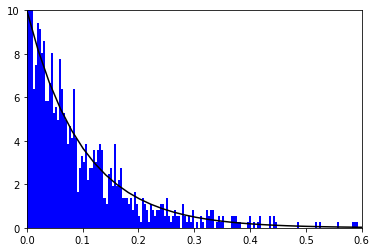

In [2]:
lam = 10.

v = np.random.exponential(scale=1/lam, size=1000)
plt.plot()
plt.hist(v,200,normed=True,color='b')

x = np.linspace(start=0, stop=2, num=100)
plt.plot(x,lam*expon.pdf(x=x)**lam,'k')

plt.ylim(0,10)
plt.xlim(0,0.6)
plt.show()

### Шаг 2. Фомируем средние, вариьируя размеры подвыборок

\%%latex
Напишем фукцию для более удобного вариьирования размера подвыборок. Аргумент n это как раз размер подвыборки.

В экспоненциальном распределении среднее арифметическое вычисляется как 
$$m_{exp}=\frac{1}{\lambda}$$
А дисперсия как  $$D_{exp} = \frac{1}{\lambda^2} $$

Для формирования аппроксимирующего нормального распределения, математическое ожидание будет равно мат.ожиданию экспоненциального распределения
$$m_{norm} = m_{exp}$$

а дисперсия удовлетворяет следующей формуле
$$D_{norm}=\sqrt{\frac{D_{exp}}{n}}$$
где n это размер подвыборки.

In [3]:
# матожидание и дисперсия модели
exp_mean = 1./lam # m[exp]
exp_var = 1./lam**2 # D[exp]



def plot_results(n):
    
    norm_var = (exp_var/n)**0.5 # D[norm]
    
    samples = np.array(
        [
            np.random.exponential(
                scale=exp_mean, 
                size=n
            ) for _ in range(1000)
        ]
    )
    
    # Функция sts.norm требует среднюю и дисперсию для
    # формирования нормального распределения
    norm_rv = sts.norm(loc=exp_mean, scale=norm_var)
    x = np.linspace(0, .3, 100)
    norm_pdf = norm_rv.pdf(x)
    plt.plot(x, norm_pdf)

    means = samples.sum(1)/n
    
    plt.hist(means, 100, normed=True)
    plt.xlabel('values')
    plt.ylabel('frequencies')
    plt.show()

### Шаг  3. Приступим к варьированию n от n=10 к n=100

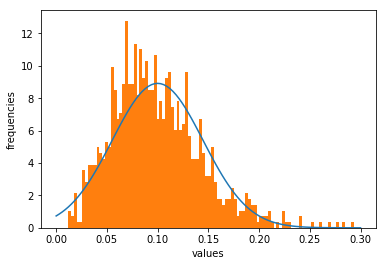

In [4]:
plot_results(5)

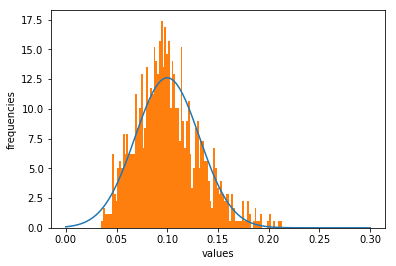

In [5]:
plot_results(10)

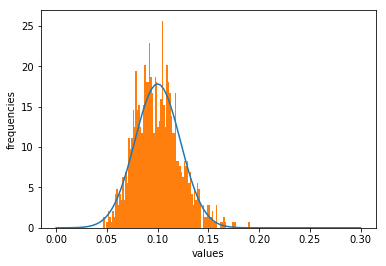

In [6]:
plot_results(20)

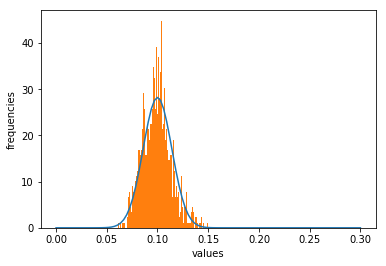

In [7]:
plot_results(50)

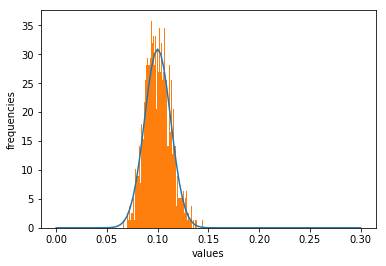

In [8]:
plot_results(60)

### Шаг 4. Выводы 

1. Мы видим что с увеличением размера подвыборки растет качество аппроксимации. 

2. При размере выборок 50 и выше нормальное распределение дает визально хорошее качество аппроксимации